# Cavity QED bistability: driven dissipative Jaynes-Cummings model


We wish to investigate a single atom in a optical cavity, where the cavity is continuosly driven by an external laser source.
The frequency of the laser $\omega_L$ can be tuned, as well as its intensity $I_L$. 
While for very weak laser intensity we expect that the steady-state properties are well described by linear response theory, at large laser intensities the cavity is filled by photons that can eventually saturate the atomic transition, described for simplicity by a two-level system (TLS).
In such situation, we expect to enter in a strongly non-linear regime, with possible unexpected quantum phenomena.

A basics understanding of this problem is provided by solving the Jaynes-Cummings model in a open quantum system framework.
The Hamiltonian is ($\hbar=1$)
$$
H_{\rm JC} = \omega_c a^{\dagger} a + \omega_q\sigma_+\sigma_- + \frac{g}{2}\left( a\sigma_+ + a^{\dagger}\sigma_-\right).
$$
In order to simulate the driven-dissipative experiment we can use three different frameworks: 
    
    1) Langevin equations (also called input-output formalism), 
$$
i\partial_t a = \left(\omega_c - i\frac{\gamma}{2}\right) a + \frac{g}{2}\sigma_- + I_L e^{-i\omega_L t} + b_{\rm in}
$$
$$
i\partial_t \sigma_- = \left(\omega_q - i\frac{\kappa}{2} \right)\sigma_- - 2g\sigma_z a - 2\sigma_z\sigma_{\rm in}
$$
$$
\partial_t \sigma_z = g\left(a \sigma_+ - a^{\dagger}\sigma_- \right) - i\frac{\kappa}{2}\left( \sigma_z + 1 \right)
$$

    2) master equation
$$
\partial_t \rho = -i\left[H_{\rm JC}+H_{\rm drive}, \rho\right] + \frac{\gamma}{2}\left( 2a\rho a^{\dagger} - \lbrace{ a^{\dagger}a, \rho\rbrace} \right) + \frac{\kappa}{8}\left( 2\sigma_-\rho \sigma_+ - \lbrace{ \sigma_+\sigma_-, \rho\rbrace} \right)
$$
       where $H_{\rm drive} = I_L \left( a e^{i\omega_L t} + a^{\dagger}e^{-i\omega_L t} \right)$
    
    3) stochastic Schrodinger equation. (...)


Before diving in the full quantum problem, by solving 2) and 3), we want to develop a basic understanding by solving 1) with a semi-classical approximation: the mean-field method.
The procedure is as follows:
we assume that the system is in a steady state described by a density matrix $\rho$. We take the expectation value of Eqs. 1) over this state, and using the steady state properties for which $\partial_t\langle{A\rangle} = 0$ (for every operator $A$) we obtain
$$
0 = \left(\omega_c - i\frac{\gamma}{2}\right) \langle{a\rangle} + \frac{g}{2}\langle{\sigma_-\rangle} + I_L e^{-i\omega_L t}
$$
$$
0 = \left(\omega_q - i\frac{\kappa}{2} \right)\langle{\sigma_-\rangle} - 2g\langle{\sigma_z a \rangle}
$$
$$
0 = g\left( \langle{a \sigma_+\rangle} - \langle{a^{\dagger}\sigma_-\rangle} \right) - i\frac{\kappa}{2}\left( \langle{\sigma_z\rangle} + 1 \right)
$$
We notice that in this equations appear the expectation values of product of operators, such that $\langle{\sigma_z a \rangle}$ and $\langle{a \sigma_+\rangle}$. In principle we could derive other Langevin equations also for these quantities, but in this equations there would be present expectation values of higher order products, ending up in an infinite set of coupled equations. In order to be able to solve these equations we need to cut this chain, breaking the hierarchy. That's why we deliberatly assume that each expectation value of products factorize in product of expectation values, like $\langle{\sigma_z a \rangle}\simeq \langle{\sigma_z\rangle} \langle{ a \rangle}. $
After a few simple passages and a slightly tricky assumptions (rotating frame and $\sigma_z$ weak dependence), we are left with
$$
\left(\Delta_c - i\frac{\gamma}{2}\right)\langle{ a \rangle} - \frac{g^2}{\left(\Delta_q - i\frac{\kappa}{2}\right)} \frac{ \langle{ a \rangle} }{1+\frac{8g^2}{i\kappa(\Delta_q - i\kappa/2)}|\langle{ a \rangle}|^2} = I_L
$$

In resonance $\Delta_c = \Delta_q = 0$ this equation takes the simple form
$$
\langle{ a \rangle} + C \frac{ \langle{ a \rangle} }{1+\frac{|\langle{ a \rangle}|^2}{n_s}} = \alpha_L
$$
where $\alpha_L = i2I_L/\gamma$ is the laser effective amplitude, $C=\frac{4g^2}{\gamma\kappa}$ is called cooperativity and $n_s = \kappa^2/(16g^2)$ is the saturation number.
We can easily make a plot out of this equation to visualize how the steady-state photon amplitude beahves as a function of the external driving strength.

For very small driving amplitude $\alpha_L\ll 1$ and $n_S\gg \alpha_L$ we can simplify this equation to
$$
\langle{ a \rangle} = \frac{\alpha_L}{1+C}
$$
while for large driving $\alpha_L\gg 1$ we have
$$
\langle{ a \rangle} = \alpha_L
$$

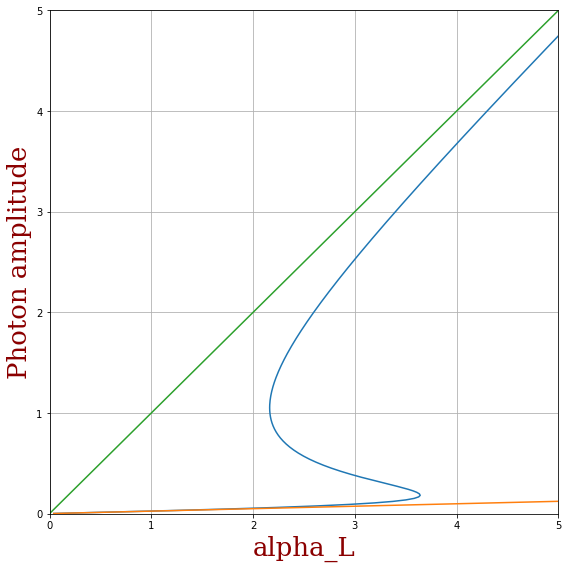

In [513]:
#Here we visualize the photon amplitude as a function of the driving amplitude
#as resulting from the mean-field (semi-classical) calculation
import numpy as np
import matplotlib.pyplot as plt

ns = .03 #we define the saturation number parameter
C = 40. #we define the cooperativity parameter

alpha = np.linspace(0.001, 6, 401) #we call the expecation of 'a' alpha, which is just a complex number
alpha_L = alpha + C*alpha/( 1 + np.square(np.abs(alpha))/ns ) #this is the driving amplitude as a function of the
                                                              # photon amplitude. In general is complex
                                                              #but without loss of generality we can take it real

#Here we make the 'bistability' plot, visualizing the histeris curve and comparing to the liming cases.
plt.figure(figsize=(8,8))
plt.plot( alpha_L, alpha  )
plt.plot( alpha*(1+C), alpha  )
plt.plot( alpha, alpha )
plt.grid()
plt.axis([0, 5, 0, 5.])
plt.xlabel('alpha_L', fontdict=font)
plt.ylabel('Photon amplitude', fontdict=font)
plt.show()

In [514]:
from qutip import * 
import numpy as np
import matplotlib.pyplot as plt

In [515]:
Nph = 50 #Here we define the maximum number of photon in the system. It sets the size of the photon's Hilber space

om_c = 1. #This is the cavity frequency
om_q = om_c #This is the atom frequency. Here we call the atom generically a 'qubit'. We take it resonant with the cavity (for simplicity).
g = .2 #This is the light-matter coupling
kappa = np.sqrt(16.*g**2. * ns) #qubit losses. We rewrite it as a function of the coupling and saturation number
gamma = 4.*g**2./kappa/C #cavity losses rewritten as a function of coupling, qubit losses and cooperativity

a = tensor(destroy(Nph), qeye(2)) #we define the cavity annihilation operator in the total Hilber space (cavity x qubit)
sigma = tensor(qeye(Nph), destroy(2)) #we define the qubit lowering operator in the total Hilber space

H = om_c*a.dag()*a + om_q*sigma.dag()*sigma + .5*g*( sigma*a.dag() + sigma.dag()*a ) #This is the JC Hamiltonian

In [537]:
#We define the interation parameter. Here we take the driving intensity, but also the driving frequency (for completness)
iter_omL = 1 #For simplicity we start by inspecting a single driving frequency. 
omL0 = om_c    #in particular we take the laser driving resonant with the cavity
domL = (1.6-omL0)/iter_omL #this is the driving frequency step for an eventual iteration

iter_I = 41 #number of intensity iteration
I0 = 0.001 #better to always include a small initial intensity to avoid diving by 0
dI = ( (gamma/2.) * 6. - I0)/iter_I #intensity steps

#I collect some quantities in 2D matrix arrays 'mat'. If there is no iteration on omega_L it would be sufficient a 1D array
mat_alpha = [] #here I store the expectation value of 'a'
mat_Navg = [] #here I store the expectation value of 'a.dag()a' (photon number)
mat_alpha_L = []
arr_omL = []
mat_rho_ss = [] #I can also collect the steady-state density matrix for each '(omega_L, I)'

for n_omL in range(iter_omL):
    omL = omL0 + n_omL*domL
    arr_alpha = []
    arr_Navg = []
    arr_alpha_L = []
    arr_rho_ss = []
    for n_I in range(iter_I):
        I = I0 + n_I*dI

        Hdriven = H - omL*( a.dag()*a + sigma.dag()*sigma ) + I*( a + a.dag() )
        rho_ss = steadystate(Hdriven, [np.sqrt(gamma)*a , np.sqrt(kappa/4.)*sigma])
        
        arr_rho_ss.append(rho_ss)
        arr_alpha.append( np.abs(expect( a, rho_ss)) )
        arr_Navg.append( np.abs(expect( a.dag()*a, rho_ss)) )
        arr_alpha_L.append(2.*I/gamma)
    arr_omL.append(omL)
    mat_alpha.append( arr_alpha )
    mat_Navg.append( arr_Navg )
    mat_alpha_L.append(arr_alpha_L)
    mat_rho_ss.append( arr_rho_ss )
    
#I transform all the number-arrays in numpy array for convenience
mat_alpha = np.asarray(mat_alpha)
mat_Navg = np.asarray(mat_Navg)
mat_alpha_L = np.asarray(mat_alpha_L)

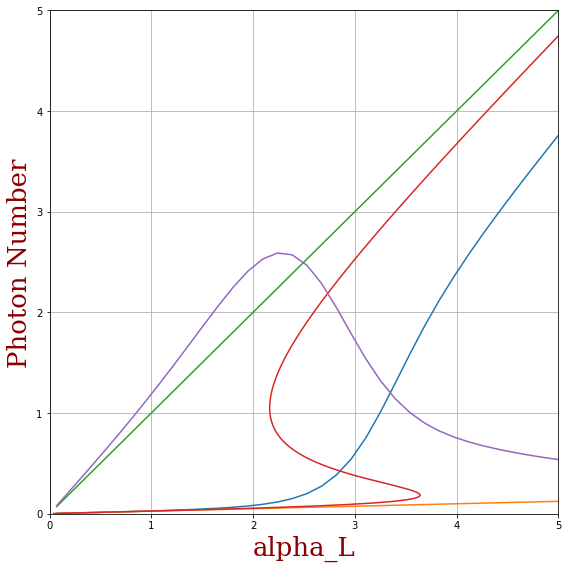

In [543]:
plt.figure(figsize=(8,8))
arr_alpha_L = np.asarray(arr_alpha_L)
plt.plot( mat_alpha_L[0], mat_alpha[0]  )
plt.plot( mat_alpha_L[0], mat_alpha_L[0]/(1.+C)  )
plt.plot( mat_alpha_L[0], mat_alpha_L[0]  )
plt.plot( alpha_L, alpha  )
plt.plot( mat_alpha_L[0], np.sqrt(np.divide(mat_Navg[0]-np.square(mat_alpha[0]),np.square(mat_alpha[0]))) )
plt.grid()
plt.axis([0, 5., 0, 5.])
plt.xlabel('alpha_L', fontdict=font)
plt.ylabel('Photon Number', fontdict=font)
plt.show()

2.3144265239794124


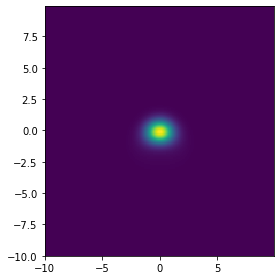

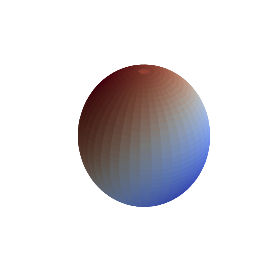

In [544]:
import matplotlib as mpl
from matplotlib import cm
from matplotlib.ticker import LinearLocator


n_I = int(iter_I/2.4)-1
print(n_I*dI/gamma*2)

rho_ph = (mat_rho_ss[0][ n_I ]).ptrace(0)
rho_q = (mat_rho_ss[0][ n_I ]).ptrace(1)

#Wigner function
xvec = np.arange(-10,10,.1)
yvec = xvec
W = wigner(rho_ph, xvec, yvec )

plt.figure(figsize=(4,4))
X, Y = np.meshgrid(xvec, yvec)
plt.pcolor(X, Y, W)
plt.show()


#Spin Q fun
n_sample = 40.
phi_vec = np.arange(-np.pi, np.pi+2*np.pi/100., 2*np.pi/n_sample )
theta_vec = np.arange(0, np.pi+np.pi/100., np.pi/n_sample )
mat_Qfun = []
for theta in theta_vec:
    arr_Qfun = []
    for phi in phi_vec:
        state_n = spin_coherent(1./2., theta, phi, type='ket')
        Qfun = expect( rho_q, state_n ) 
        arr_Qfun.append(Qfun.real)
    mat_Qfun.append(arr_Qfun)
mat_Qfun = np.asarray(mat_Qfun)
        
fcolors = mat_Qfun
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)
# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.coolwarm(fcolors))
# Turn off the axis planes
ax.set_axis_off()
plt.show()



